<a href="https://colab.research.google.com/github/DataGalz/CIND820/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries and uploading the data

In [137]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics




In [138]:

url = 'https://raw.githubusercontent.com/DataGalz/CIND820/main/BCPI_MONTHLY-sd-1972-01-01.csv'

data = pd.read_csv(url)
df = pd.DataFrame(data)
print(df)
#converted the data into a dataframe




           date  M.BCPI  M.BCNE   M.ENER  M.MTLS   M.FOPR  M.AGRI   M.FISH
0    1972-01-01  100.00  100.00   100.00  100.00   100.00  100.00   100.00
1    1972-02-01  100.40  100.53    99.78  100.74   100.12  101.20    88.89
2    1972-03-01  101.11  101.35   100.05  101.38   100.24  102.53    98.97
3    1972-04-01  101.16  101.45    99.84  101.21   100.95  102.08   103.10
4    1972-05-01  101.88  102.30   100.00  101.25   102.32  103.53    86.30
..          ...     ...     ...      ...     ...      ...     ...      ...
592  2021-05-01  603.08  524.90  1173.22  733.52  1101.94  310.20  1451.32
593  2021-06-01  606.63  488.98  1289.50  720.94   838.80  306.31  1534.54
594  2021-07-01  593.87  455.44  1334.47  730.52   536.88  321.88  1737.96
595  2021-08-01  568.19  440.31  1261.77  738.36   437.00  328.36  1658.92
596  2021-09-01  596.69  446.58  1378.81  749.09   477.69  315.44  1718.73

[597 rows x 8 columns]


# Exploring the Dataset

In [139]:
df.dtypes
#checking the type of data

date       object
M.BCPI    float64
M.BCNE    float64
M.ENER    float64
M.MTLS    float64
M.FOPR    float64
M.AGRI    float64
M.FISH    float64
dtype: object

In [140]:
df.head(5)
# the first 5 rows of the data

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
0,1972-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1972-02-01,100.40,100.53,99.78,100.74,100.12,101.20,88.89
2,1972-03-01,101.11,101.35,100.05,101.38,100.24,102.53,98.97
3,1972-04-01,101.16,101.45,99.84,101.21,100.95,102.08,103.10
4,1972-05-01,101.88,102.30,100.00,101.25,102.32,103.53,86.30


In [141]:
df.tail(5)
#the last 5 rows of the data

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
592,2021-05-01,603.08,524.90,1173.22,733.52,1101.94,310.20,1451.32
593,2021-06-01,606.63,488.98,1289.50,720.94,838.80,306.31,1534.54
594,2021-07-01,593.87,455.44,1334.47,730.52,536.88,321.88,1737.96
595,2021-08-01,568.19,440.31,1261.77,738.36,437.00,328.36,1658.92
596,2021-09-01,596.69,446.58,1378.81,749.09,477.69,315.44,1718.73


In [142]:
df_new = df.rename(columns={'M.BCPI': 'Total_CPI', 'M.AGRI': 'CPI_Agri', 'M.BCNE': 'CPI_NonEner', 'M.ENER': 'CPI_Ener','M.MTLS': 'CPI_Metals', 'M.FOPR': 'CPI_Forst', 'M.FISH': 'CPI_Fish'})
print(df_new)

           date  Total_CPI  CPI_NonEner  ...  CPI_Forst  CPI_Agri  CPI_Fish
0    1972-01-01     100.00       100.00  ...     100.00    100.00    100.00
1    1972-02-01     100.40       100.53  ...     100.12    101.20     88.89
2    1972-03-01     101.11       101.35  ...     100.24    102.53     98.97
3    1972-04-01     101.16       101.45  ...     100.95    102.08    103.10
4    1972-05-01     101.88       102.30  ...     102.32    103.53     86.30
..          ...        ...          ...  ...        ...       ...       ...
592  2021-05-01     603.08       524.90  ...    1101.94    310.20   1451.32
593  2021-06-01     606.63       488.98  ...     838.80    306.31   1534.54
594  2021-07-01     593.87       455.44  ...     536.88    321.88   1737.96
595  2021-08-01     568.19       440.31  ...     437.00    328.36   1658.92
596  2021-09-01     596.69       446.58  ...     477.69    315.44   1718.73

[597 rows x 8 columns]


In [143]:
df_new.describe()
#describe the data


,Total_CPI,CPI_NonEner,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
count,597.000000,597.00000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,342.790369,253.76072,759.306265,360.757705,282.288224,191.433317,683.961642
std,148.170932,79.38940,477.890514,177.418661,107.034746,46.860202,403.135415
min,100.000000,100.00000,99.780000,100.000000,100.000000,100.000000,86.300000
25%,250.800000,197.67000,407.970000,237.160000,201.320000,160.550000,262.270000
50%,286.330000,232.47000,635.920000,283.060000,278.370000,178.300000,717.250000
75%,420.880000,320.50000,982.080000,536.440000,337.070000,210.920000,985.100000
max,881.310000,524.90000,2755.750000,779.920000,1101.940000,328.360000,1831.730000


In [144]:
print("Skewness: %f" % df_new['Total_CPI'].skew())
print("Kurtosis: %f" % df_new['Total_CPI'].kurt())

Skewness: 0.950204
Kurtosis: 0.217021


In [145]:
min(df_new.CPI_Agri)
#checking the year and month where the CPI was lowest

100.0

In [146]:
max(df_new.CPI_Agri)

#checking the year and month where the CPI was highest

328.36

In [147]:
max(df_new.date)

'2021-09-01'

In [148]:
df_new.isnull().sum()
#checking for null values

date           0
Total_CPI      0
CPI_NonEner    0
CPI_Ener       0
CPI_Metals     0
CPI_Forst      0
CPI_Agri       0
CPI_Fish       0
dtype: int64

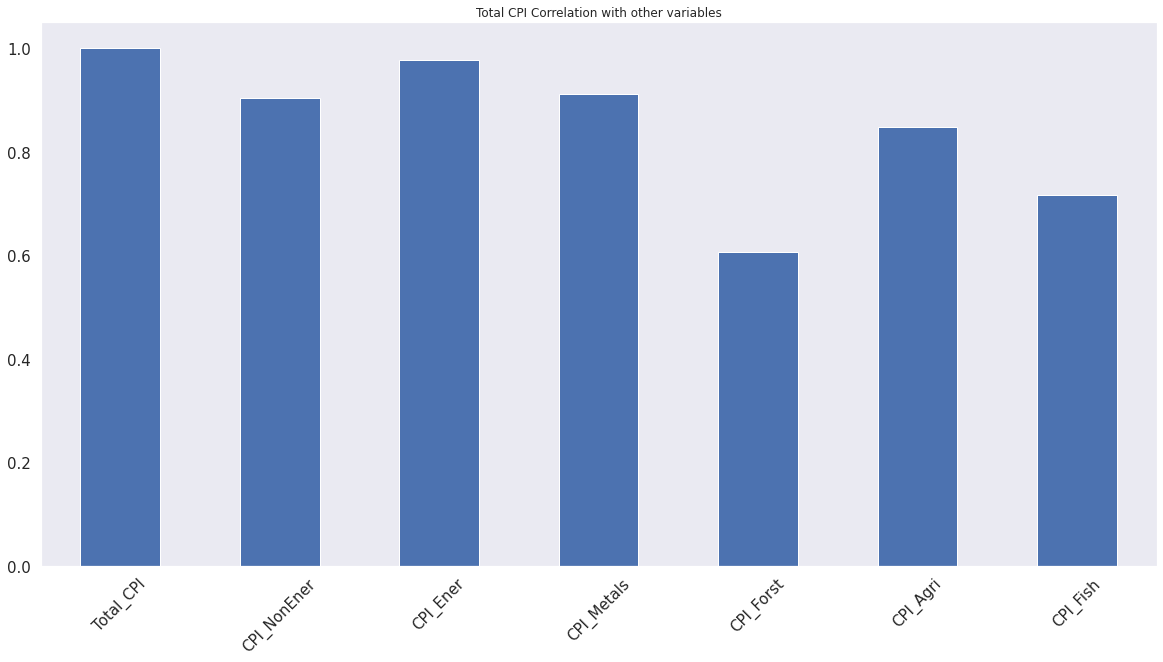

In [149]:
df_new.corrwith(df_new.Total_CPI).plot.bar(
figsize = (20, 10), title = "Total CPI Correlation with other variables", fontsize = 15, rot = 45, grid = False)

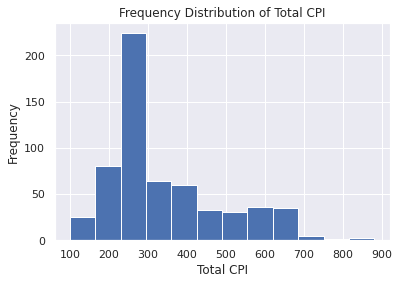

In [150]:
plt.hist(x=df_new['Total_CPI'], bins=12)
plt.xlabel("Total CPI")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Total CPI")
plt.show()

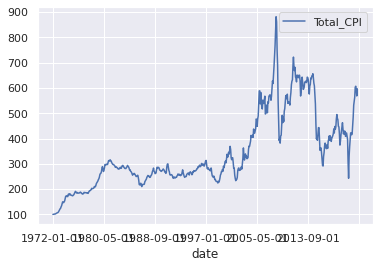

In [151]:
ax = df_new.plot(x='date', y='Total_CPI', rot=0)
plt.legend()


,Total_CPI,CPI_NonEner,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
Total_CPI,1.000000,0.903644,0.977267,0.910876,0.606498,0.848023,0.715992
CPI_NonEner,0.903644,1.000000,0.804170,0.967183,0.822376,0.874488,0.830922
CPI_Ener,0.977267,0.804170,1.000000,0.833749,0.476074,0.788788,0.631449
CPI_Metals,0.910876,0.967183,0.833749,1.000000,0.694953,0.859512,0.763231
CPI_Forst,0.606498,0.822376,0.476074,0.694953,1.000000,0.558940,0.810035
CPI_Agri,0.848023,0.874488,0.788788,0.859512,0.558940,1.000000,0.598726
CPI_Fish,0.715992,0.830922,0.631449,0.763231,0.810035,0.598726,1.000000


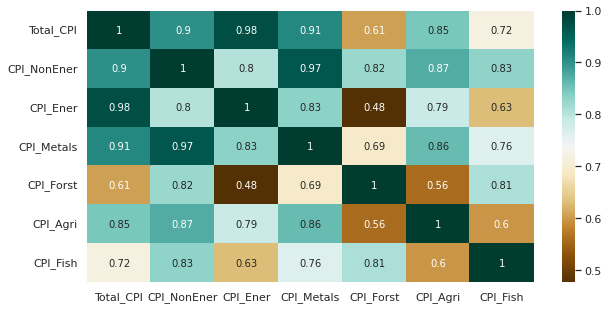

In [152]:
plt.figure(figsize=(10,5))
cor= df_new.corr()
sns.heatmap(cor,cmap="BrBG",annot=True)
cor

#checking correcation of data to identify attributes that are highly correlated with each other

In [153]:
df1 = df_new.drop(['CPI_NonEner'], axis=1)
df1.head()


,date,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
0,1972-01-01,100.00,100.00,100.00,100.00,100.00,100.00
1,1972-02-01,100.40,99.78,100.74,100.12,101.20,88.89
2,1972-03-01,101.11,100.05,101.38,100.24,102.53,98.97
3,1972-04-01,101.16,99.84,101.21,100.95,102.08,103.10
4,1972-05-01,101.88,100.00,101.25,102.32,103.53,86.30


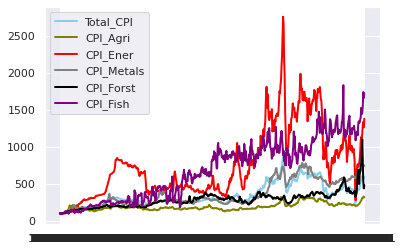

In [154]:
plt.plot( 'date', 'Total_CPI', data=df1, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'date', 'CPI_Agri', data=df1, marker='', color='olive', linewidth=2)
plt.plot( 'date', 'CPI_Ener', data=df1, marker='', color='red', linewidth=2)
plt.plot( 'date', 'CPI_Metals', data=df1, marker='', color='grey', linewidth=2)
plt.plot( 'date', 'CPI_Forst', data=df1, marker='', color='black', linewidth=2)
plt.plot( 'date', 'CPI_Fish', data=df1, marker='', color='purple', linewidth=2)

# show legend
plt.legend()

# show graph
plt.show()

In [155]:

df1.corr()


,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
Total_CPI,1.000000,0.977267,0.910876,0.606498,0.848023,0.715992
CPI_Ener,0.977267,1.000000,0.833749,0.476074,0.788788,0.631449
CPI_Metals,0.910876,0.833749,1.000000,0.694953,0.859512,0.763231
CPI_Forst,0.606498,0.476074,0.694953,1.000000,0.558940,0.810035
CPI_Agri,0.848023,0.788788,0.859512,0.558940,1.000000,0.598726
CPI_Fish,0.715992,0.631449,0.763231,0.810035,0.598726,1.000000


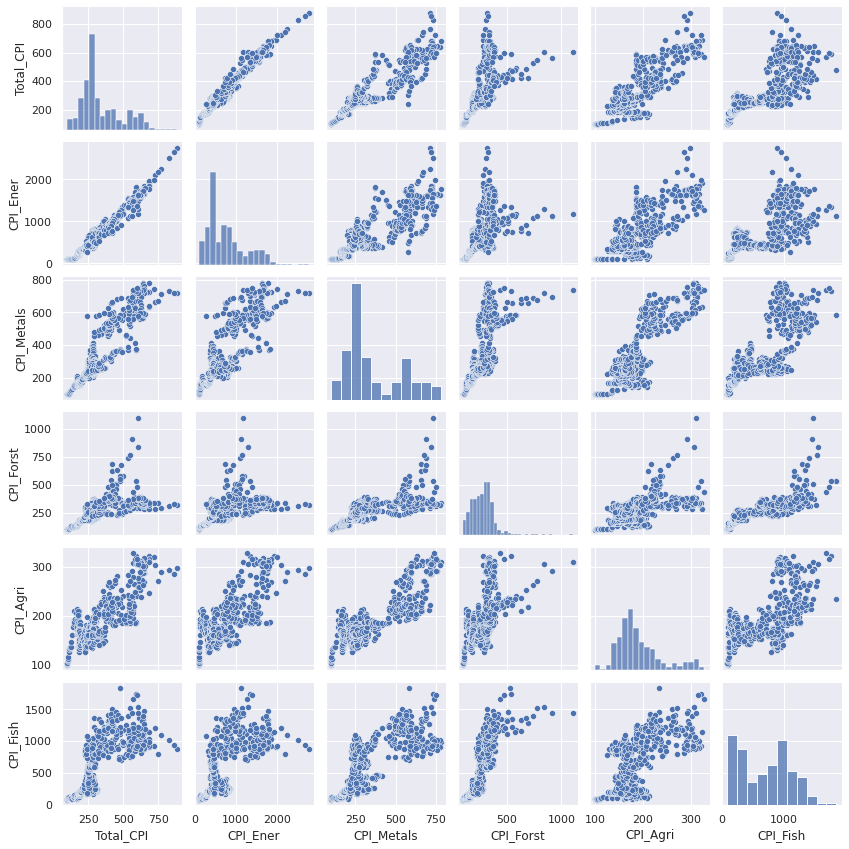

In [156]:

sns.set()
cols = ['Total_CPI', 'CPI_Ener', 'CPI_Metals', 'CPI_Forst', 'CPI_Agri', 'CPI_Fish']
sns.pairplot(df1[cols], height = 2)
plt.show()

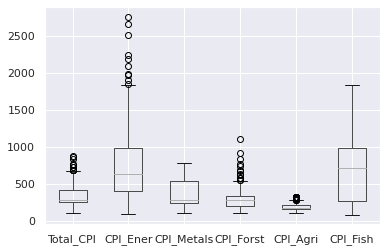

In [157]:
np.random.seed(19680801)

boxplot = df1.boxplot()

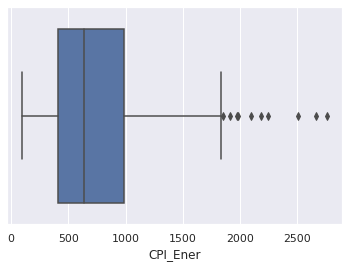

In [158]:
sns.boxplot(x=df1['CPI_Ener'])


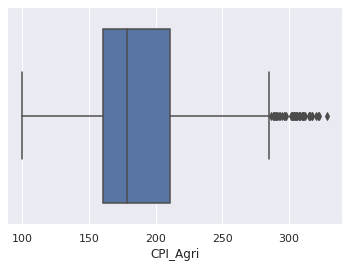

In [159]:
sns.boxplot(x=df1['CPI_Agri'])

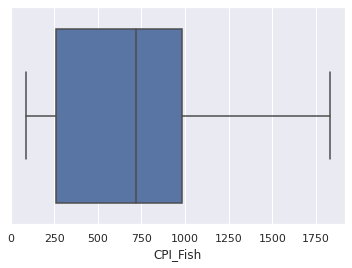

In [160]:
sns.boxplot(x=df1['CPI_Fish'])

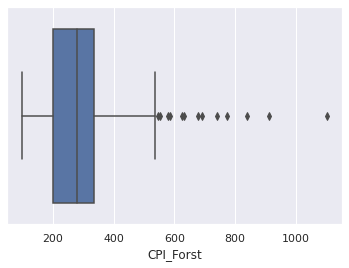

In [161]:
sns.boxplot(x=df1['CPI_Forst'])

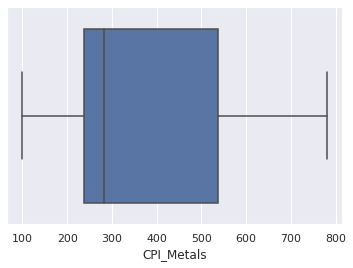

In [162]:
sns.boxplot(x=df1['CPI_Metals'])

In [163]:
X = df1[['CPI_Ener','CPI_Agri', 'CPI_Metals', 'CPI_Forst', 'CPI_Fish']] 
Y = df1['Total_CPI']
 
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_CPI_Ener = 1400
New_CPI_Agri = 320
New_CPI_Metals = 800
New_CPI_Forst = 480
New_CPI_Fish = 2000
print ('Predicted Total CPI: \n', regr.predict([[New_CPI_Ener ,New_CPI_Agri, New_CPI_Metals, New_CPI_Forst, New_CPI_Fish ]]))



Intercept: 
 40.60803194721058
Coefficients: 
 [ 2.27563607e-01  1.93301242e-01  1.47859235e-01  1.38559609e-01
 -9.87455840e-05]
Predicted Total CPI: 
 [605.65198873]


In [164]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Total_CPI   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Wed, 03 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:13:11   Log-Likelihood:                -2428.2
No. Observations:                 597   AIC:                             4868.
Df Residuals:                     591   BIC:                             4895.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6080      3.275     12.400      0.0

In [165]:
df1 = df_new.drop(['CPI_Fish', 'date'], axis=1)
df1.head()

,Total_CPI,CPI_NonEner,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri
0,100.00,100.00,100.00,100.00,100.00,100.00
1,100.40,100.53,99.78,100.74,100.12,101.20
2,101.11,101.35,100.05,101.38,100.24,102.53
3,101.16,101.45,99.84,101.21,100.95,102.08
4,101.88,102.30,100.00,101.25,102.32,103.53


In [166]:
#Normalize the data set
df_norm = df1
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_norm)
df_norm.loc[:,:] = scaled_values
df_norm.head()


,Total_CPI,CPI_NonEner,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri
0,0.000000,0.000000,0.000083,0.000000,0.000000,0.000000
1,0.000512,0.001247,0.000000,0.001088,0.000120,0.005255
2,0.001421,0.003177,0.000102,0.002030,0.000240,0.011079
3,0.001485,0.003413,0.000023,0.001780,0.000948,0.009108
4,0.002406,0.005413,0.000083,0.001838,0.002316,0.015458


In [188]:
 # Divide the dataset to training and test sets
df_3 = df_norm.iloc[:,].copy()
x=df_3.drop('Total_CPI', axis = 1)
y=df_3['Total_CPI']
 
le =LabelEncoder()
y= le.fit_transform(y)
 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)

(477, 5)
(120, 5)


In [189]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.45
Mean Squared Error: 276.55
Root Mean Squared Error: 16.629792542301903


In [190]:
#Used the KNN algorithm to predict total CPI using the attributes

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       1.0
          24       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [170]:
ts_c = StandardScaler()
x_train = s_c.fit_transform(x_train) 
x_test=s_c.fit_transform(x_test)
KNN = KNeighborsClassifier (n_neighbors=7,p=1)
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
pred_value=KNN.predict(x_test)
pred_value

array([458, 197, 177,  82, 564, 271, 445, 359, 445, 463, 475, 196,  29,
       164,  39, 436, 542, 188, 432, 462, 518, 373, 410, 463, 361,  50,
       171, 197,  97,  19,  33,  96, 242, 171, 512,  29, 373, 233,  19,
       353, 438,  29, 512, 494, 542, 518, 149,  17, 492, 461, 110, 160,
       521, 365,  91, 259, 188, 331, 152,  39, 140, 306, 161, 206,  96,
       445, 475, 109, 171,  29, 392, 458, 100, 542,  29, 136, 149, 470,
       374, 512, 139,  71, 130,  17, 475, 136, 446, 306, 493, 109,  10,
       473, 512,  91, 199, 164, 342, 306,  89,  29,  29,  98, 463, 444,
        84,  85,  82, 109, 414, 361,  82, 160,  82, 390, 137, 131, 450,
       130, 109, 395])

In [171]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

          10       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          27       0.00      0.00      0.00       1.0
          29       0.00      0.00      0.00       0.0
          33       0.00      0.00      0.00       0.0
          36       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       0.0
          40       0.00      0.00      0.00       1.0
          45       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       0.0
          51       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [172]:
#Displaying the confusion matrix to evaluate the model performance
y_pred = KNN.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm_data = pd.DataFrame(cm, 
                       columns = ['Predicted Low', 'Predicted Medium', 'Predicted'], 
                       index = ['Actual Low', 'Actual Medium', ' Actual High'])

ValueError: ignored

In [ ]:
#Evaluating the model performance by computing Accuracy, Sensitivity and Specificity
print(classification_report(y_test, y_pred))